<h1 align="center"> Statistics and Financial Data Analysis </h1>

In [1]:
%reset -f
import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import math as m
import scipy as sp
from statsmodels.stats.anova import anova_lm

In [2]:
# Will fix figure size for this notebook
plt.rcParams["figure.figsize"] = (8,6)

Auto-Correlation Function (ACF)
====

In [3]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


The partial autocorrelation function is similar to the ACF except that it displays only the correlation between two observations that the shorter lags between those observations do not explain. For example, the partial autocorrelation for lag 3 is only the correlation that lags 1 and 2 do not explain. In other words, the partial correlation for each lag is the unique correlation between those two observations after partialling out the intervening correlations.

In [4]:
df1 = pd.read_csv('GSRet.csv', index_col = 0)
df2 = pd.read_csv('LogVol.csv', index_col = 0)
# GS daily log return
GSrtn = df1['x']
# Log of GS volume traded
GSLogVol = df2['x']
# GS volume traded
GSVol = np.exp(GSLogVol)

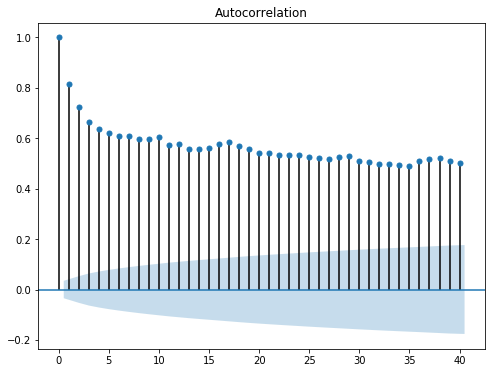

In [5]:
plot_acf(GSVol, lags = 40)
plt.show()

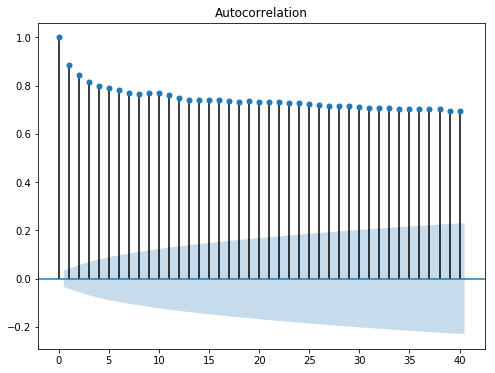

In [6]:
plot_acf(GSLogVol, lags = 40)
plt.show()

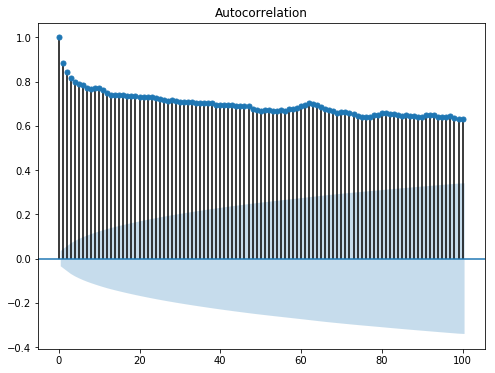

In [7]:
plot_acf(GSLogVol, lags = 100)
plt.show()

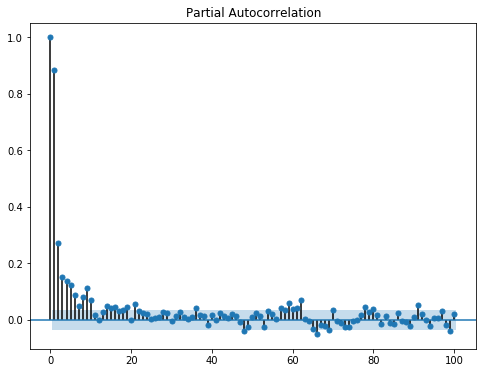

In [8]:
plot_pacf(GSLogVol, lags = 100)
plt.show()

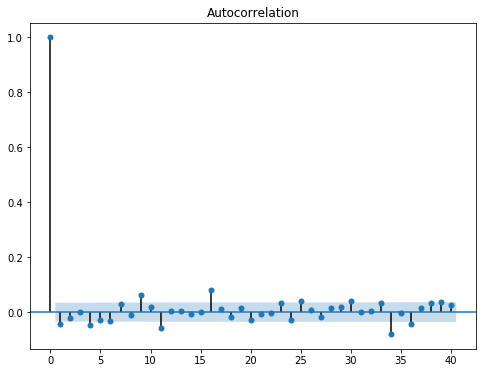

In [9]:
plot_acf(GSrtn, lags = 40)
plt.show()

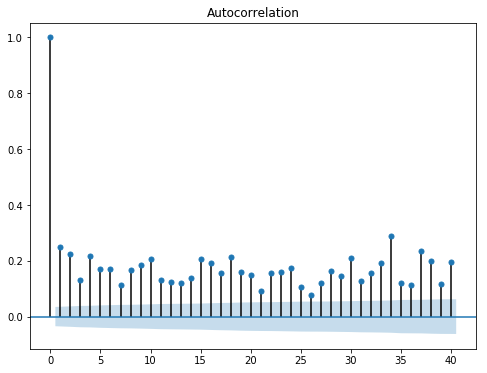

In [10]:
plot_acf(GSrtn**2, lags = 40)
plt.show()


In [11]:
sm.stats.acorr_ljungbox(GSrtn,lags=10)

(array([ 6.12394971,  7.50712417,  7.51009554, 14.90675509, 17.78016121,
        21.36984901, 24.10671441, 24.37122838, 36.75386701, 37.75699869]),
 array([1.33362497e-02, 2.34341227e-02, 5.72996209e-02, 4.89857235e-03,
        3.23492549e-03, 1.57393667e-03, 1.09116834e-03, 1.98521282e-03,
        2.91171740e-05, 4.18311579e-05]))

In [12]:
start_date = '2018-01-01'
end_date = '2019-12-31'

df = pd_data.DataReader("AAPL",'yahoo',start_date,end_date)['Adj Close']
df_rtn = np.log(df).diff().dropna()

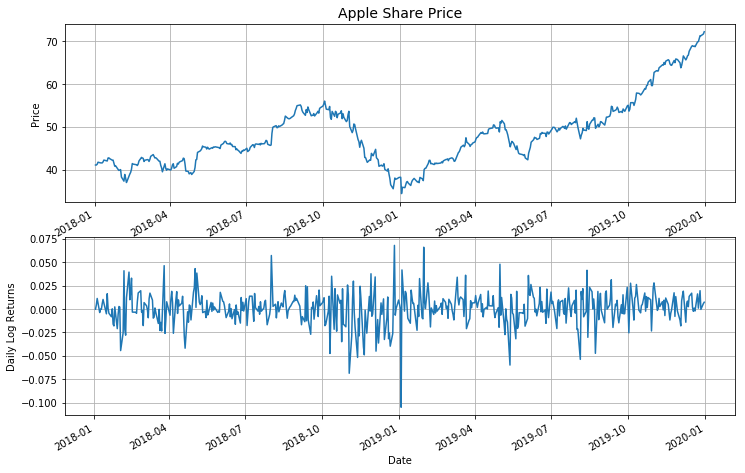

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(2,1, 1)
df.plot()
plt.grid()
plt.ylabel("Price")
plt.title("Apple Share Price", fontsize = 14)
plt.subplot(2,1, 2)
df_rtn.plot()
plt.grid()
plt.ylabel("Daily Log Returns")
plt.savefig("Apple_stationary")

In [14]:
df2 = pd.read_csv('AirPassengers.csv')
len(df2)

144

In [15]:
df2['Year'] = np.linspace(1948,1960,144)

df2 = df2.set_index(['Year'])
df2

,x
Year,
1948.000000,112
1948.083916,118
1948.167832,132
1948.251748,129
1948.335664,121
1948.419580,135
1948.503497,148
1948.587413,148
1948.671329,136


<Figure size 864x576 with 0 Axes>

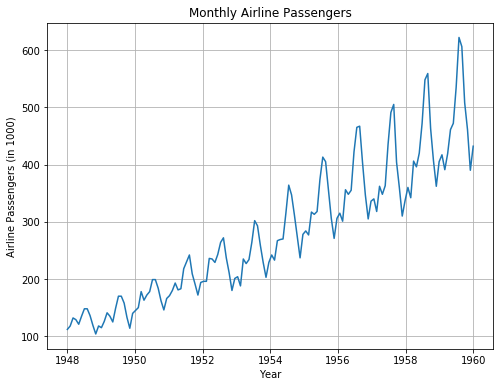

In [16]:
plt.figure(figsize=(12,8))
df2.plot(legend = None)
plt.grid()
plt.ylabel("Airline Passengers (in 1000)")
plt.title("Monthly Airline Passengers")
plt.savefig("AirlinePass")

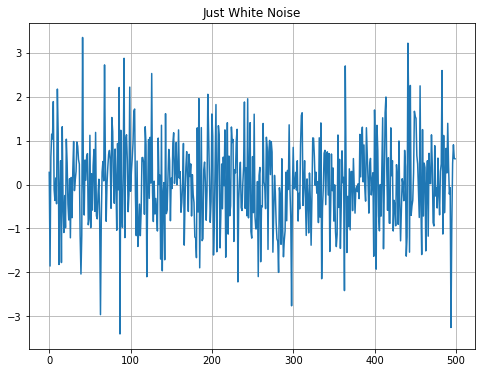

In [17]:
np.random.seed(17)
rv = stats.norm(0,1)

nx = 500
x = rv.rvs(nx)

plt.plot(x)
plt.grid()
plt.title("Just White Noise")
plt.savefig("White Noise")

In [18]:
def plot_diagnosticsTight2(data, rtn, title1 = 'APPLE'):

    fig, axes = plt.subplots(1,2,figsize=(15,5))
    axes[0].set_ylabel('ACF', fontsize=10)
    axes[0].set_xlabel('Lag', fontsize=10)
    fig = plot_acf(data,lags=25,zero=True, ax = axes[0], title= 'ACF '+ title1, use_vlines = True)
    axes[1].set_ylabel('ACF', fontsize=10)
    axes[1].set_xlabel('Lag', fontsize=10)
    fig = plot_acf(rtn,lags=25,zero=True, ax = axes[1], title= 'ACF Log Returns '+ title1, use_vlines = True)
    plt.tight_layout()
    plt.savefig("ACF2.png", dpi = 300)

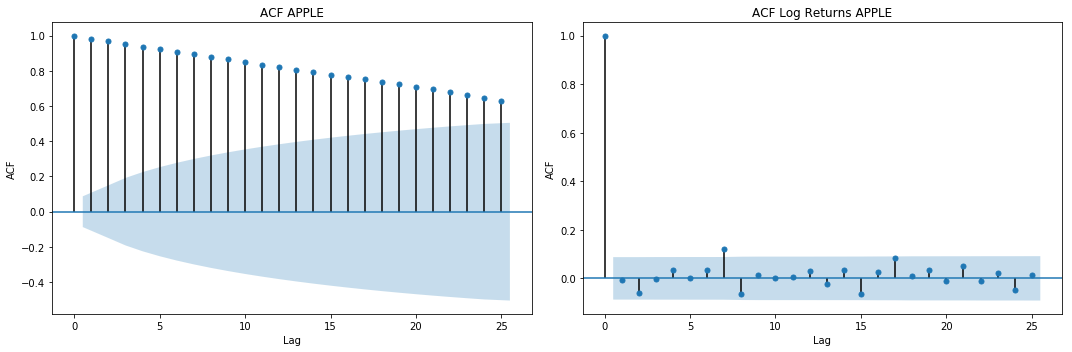

In [19]:
plot_diagnosticsTight2(df, df_rtn)

A simple example with gaussian white noise
===

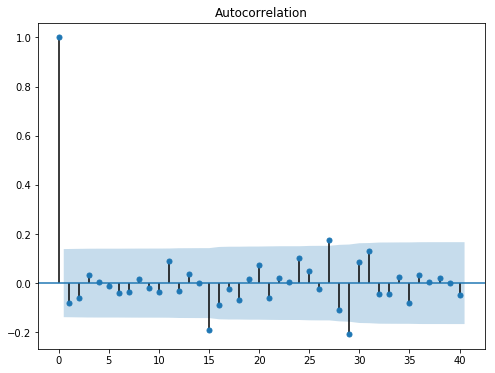

In [20]:
# Usin ACF tests for a sequence of iid noise.
np.random.seed(17)
x_time_series = stats.norm(0,1).rvs(size=200)
plot_acf(x_time_series, lags = 40, zero = True)
plt.show()


- The sample size is 200 (ordered as 200 observations in a time series)
- Expected ACF is zero for any lag h >0.
- We'd expect the $\hat{\rho}_h$ to be distributed approx as $N(0,1/n)$ for large $n$.
- Hence, given $H_0: \hat{\rho}_h=0$, we would expect that 95% of samples would fall within the confidence interval $(-1.96/ \sqrt{n},1.96 /\sqrt{n})$
- This would be for 40 lags, roughly 2, as we can see below, pretty close.

An example with FX Data
===

In [21]:
start_date = '2010-01-01'
end_date = '2019-12-31'

df = pd_data.DataReader("EURUSD=X",'yahoo',start_date,end_date)['Adj Close']
df_rtn = np.log(df).diff().dropna()

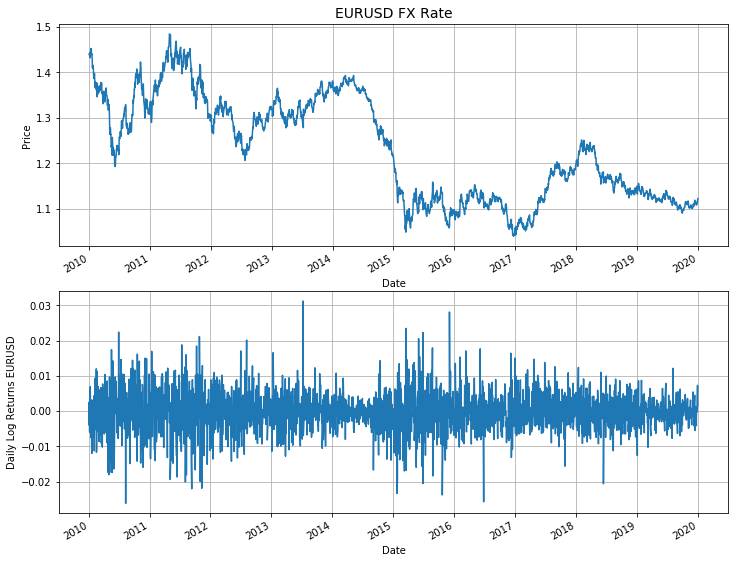

In [22]:
plt.figure(figsize=(12,10))
plt.subplot(2,1, 1)
df.plot()
plt.grid()
plt.ylabel("Price")
plt.title("EURUSD FX Rate", fontsize = 14)
plt.subplot(2,1, 2)
df_rtn.plot()
plt.grid()
plt.ylabel("Daily Log Returns EURUSD")
plt.savefig("EURUSD_stationary")

In [23]:
EURUSDRtn = df_rtn

lags = m.floor(np.log(len(EURUSDRtn))) # Choosing a good lag number for test
ljbox_test_EURUSD = sm.stats.acorr_ljungbox(EURUSDRtn,lags)
ljbox_test_EURUSD

(array([ 5.32317727,  5.41787542,  7.8378109 ,  7.93108316,  9.72607053,
        10.22445651, 10.5296549 ]),
 array([0.02104361, 0.06660753, 0.04948533, 0.09413558, 0.08337959,
        0.11551238, 0.16049165]))

In [24]:
ljbox_test_EURUSD[1][6] # Look at p value of test for lag 8

0.16049165290174983

p-value is high, so we cannot reject the hypothesis this is white noise.
===

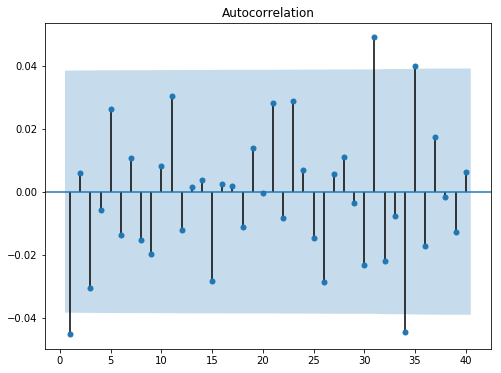

In [25]:
plot_acf(EURUSDRtn, lags = 40, zero = False)
plt.show()

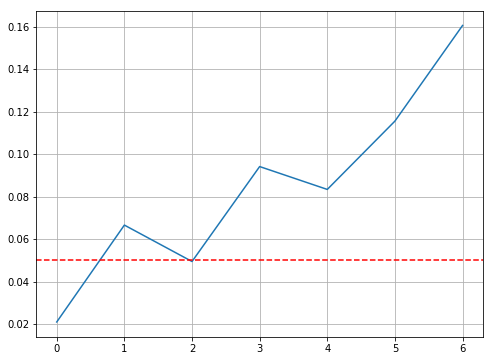

In [26]:
plt.plot(ljbox_test_EURUSD[1])
plt.axhline(y=0.05, color='r',ls='--')
plt.grid()
plt.show()

In [27]:
# Selecting other assets 

import pandas_datareader as pd_data
start_date = '2007-01-04'
end_date = '2019-10-25'
CiscoData = pd_data.DataReader('CSCO','yahoo',start_date,end_date)
CiscoData.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-04,28.49,27.540001,27.680000,28.459999,73012100.0,21.455891
2007-01-05,28.57,28.049999,28.440001,28.469999,62647800.0,21.463434
2007-01-08,28.74,28.320000,28.540001,28.629999,47936500.0,21.584061
2007-01-09,28.75,28.309999,28.719999,28.469999,50488300.0,21.463434
2007-01-10,28.73,28.209999,28.270000,28.680000,50632400.0,21.621756


In [28]:
CiscoDataFixed_df = pd.read_csv('CiscoPrice5.csv', index_col = 0)
CiscoDataFixed_df.head()

,CSCO.Open,CSCO.High,CSCO.Low,CSCO.Close,CSCO.Volume,CSCO.Adjusted
1,27.459999,27.98,27.330000,27.730000,64226000,21.624001
2,27.680000,28.49,27.540001,28.459999,73012100,22.193258
3,28.440001,28.57,28.049999,28.469999,62647800,22.201054
4,28.540001,28.74,28.320000,28.629999,47936500,22.325829
5,28.719999,28.75,28.309999,28.469999,50488300,22.201054


In [29]:
CiscoDataFixed_df = pd.read_csv('CiscoRet.csv', index_col = 0)
CiscoDataFixed_df.head()

,CSCO.Close
1,0.025985
2,0.000351
3,0.005604
4,-0.005604
5,0.007349


In [30]:
# Log returns
CiscoRtn = np.log(CiscoData['Close']).diff().dropna() #diff = log(p(t))- log(p(t-1))= log(p(t)/p(t-1)),continuosly compounded return
CiscoRtn.head()
len(CiscoRtn)

3225

3225


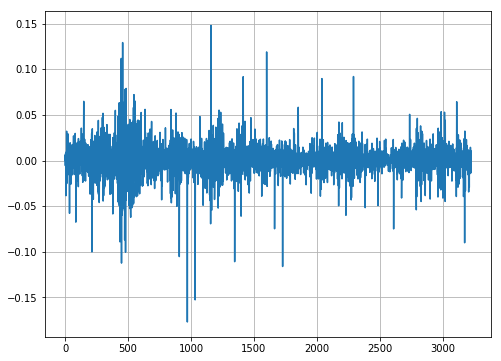

In [31]:
plt.plot(CiscoRtn.values)
print(len(CiscoRtn))
plt.grid()
plt.show()

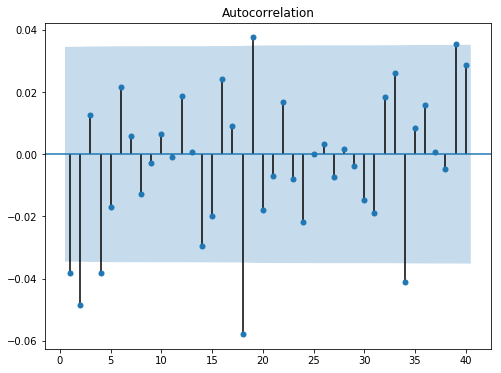

In [32]:
plot_acf(CiscoRtn, lags = 40,zero = False)
plt.show()

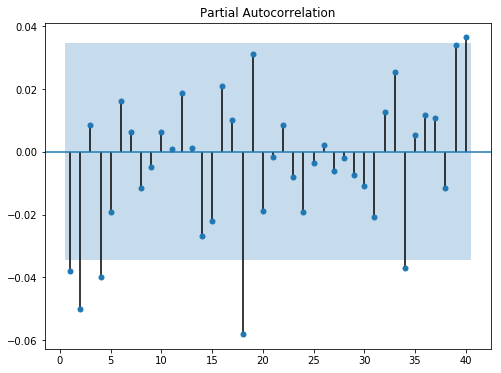

In [33]:
plot_pacf(CiscoRtn, lags = 40,zero = False)
plt.show()

In [34]:
 lags = m.floor(np.log(len(CiscoRtn)))
ljbox_test_cisco = sm.stats.acorr_ljungbox(CiscoRtn,lags)
ljbox_test_cisco

(array([ 4.68447564, 12.30089714, 12.8022749 , 17.48513795, 18.43096585,
        19.94463351, 20.05957488, 20.58324318]),
 array([0.03043635, 0.00213252, 0.00508431, 0.00155534, 0.00245207,
        0.00283294, 0.00544243, 0.00834089]))

In [35]:
ljbox_test_cisco[1][7] # Look at p value of test for lag 8 and reject hypothesis of white noise...

0.00834089295985009

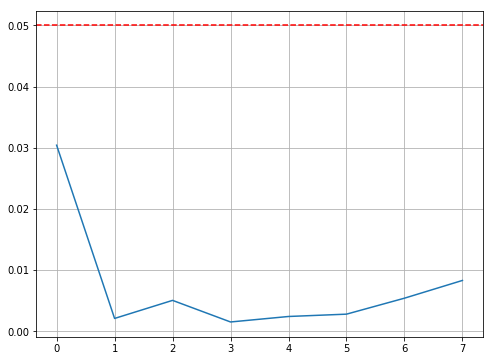

In [36]:
plt.plot(ljbox_test_cisco[1])
plt.axhline(y=0.05, color='r',ls='--')
plt.grid()
plt.show()

Time Series Analysis Module in Python
===

- In R, the TSA library is used and in Python, an equivalent TSA module is part of statsmodels.
- Next, we will show some examples of AR(1) processes.
- Subsequently, methods for order selection for AR processes will be examnied.

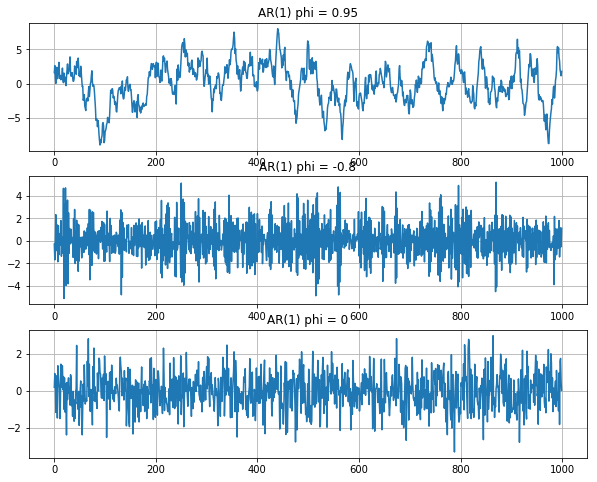

In [37]:
# Importing the Time Series Analysis module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import arma_order_select_ic
import statsmodels.tsa.stattools as sm_tools
plt.figure(1, figsize=(10,8))

# AR for phi = 0.95
plt.subplot(3,1,1)
plt.title('AR(1) phi = 0.95')
phi = 0.95
phi1 = phi
ar1 = np.array([1, - phi])#The input is inserted as negative in function
dummy = np.array([1])
result1 = ArmaProcess(ar1, dummy)#for the moment, no moving average, so this is just a dummy var
data_ar1 = result1.generate_sample(nsample=1000)
plt.plot(data_ar1)
plt.grid()

# AR for phi = -0.8
plt.subplot(3,1,2)
plt.title('AR(1) phi = -0.8')
phi = -0.8
phi2 = phi
ar1 = np.array([1, - phi])#The input is inserted as negative in function
dummy = np.array([1])
result2 = ArmaProcess(ar1, dummy)#for the moment, no moving average, so this is just a dummy var
data_ar2 = result2.generate_sample(nsample=1000)
plt.plot(data_ar2)
plt.grid()


# AR for phi = 0
plt.subplot(3,1,3)
plt.title('AR(1) phi = 0')
phi = 0
phi3 = phi
ar1 = np.array([1, - phi])#The input is inserted as negative in function
dummy = np.array([1])
result3 = ArmaProcess(ar1, dummy)#for the moment, no moving average, so this is just a dummy var
data_ar3 = result3.generate_sample(nsample=1000)
plt.plot(data_ar3)
plt.grid()
#plt.savefig('ACF_ARExample')

<Figure size 1080x864 with 0 Axes>

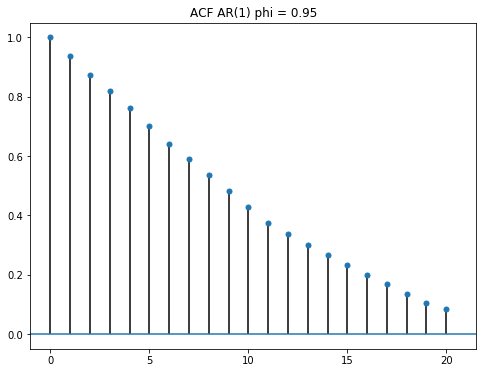

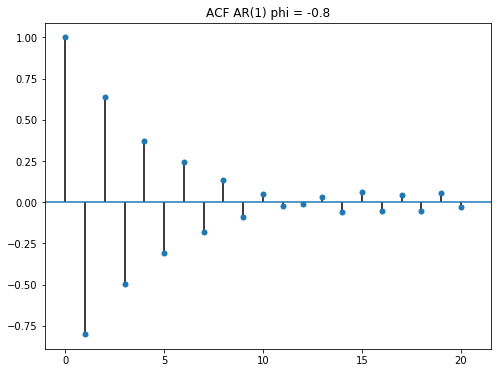

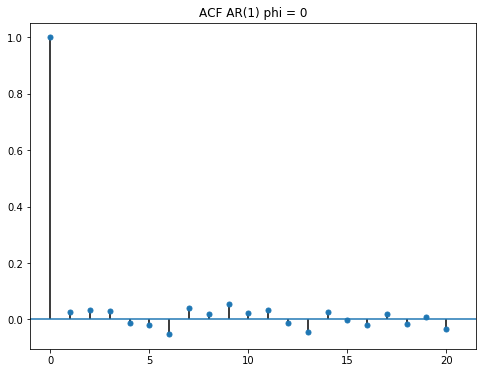

In [38]:
# Charateristic of ACFs for AR(1)

plt.figure(1, figsize=(15,12))

# AR for phi = 0.95 # this is more like random walk
plot_acf(data_ar1, alpha =1,  lags = 20,zero=True)
plt.title('ACF AR(1) phi = 0.95')
plt.show()

# AR for phi = -0.8
plot_acf(data_ar2, alpha =1, lags = 20,zero=True)
plt.title('ACF AR(1) phi = -0.8')
plt.show()

# AR for phi = 0 # this is more like white noise
plot_acf(data_ar3, alpha =1, lags = 20,zero=True)
plt.title('ACF AR(1) phi = 0')
plt.show()

<Figure size 720x432 with 0 Axes>

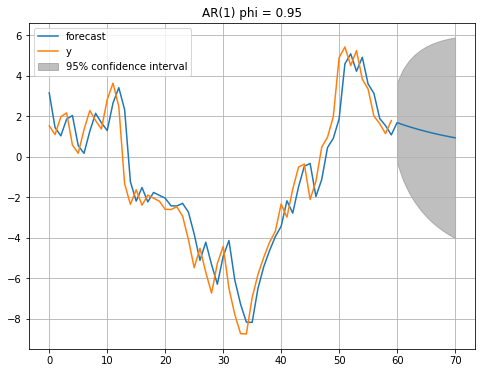

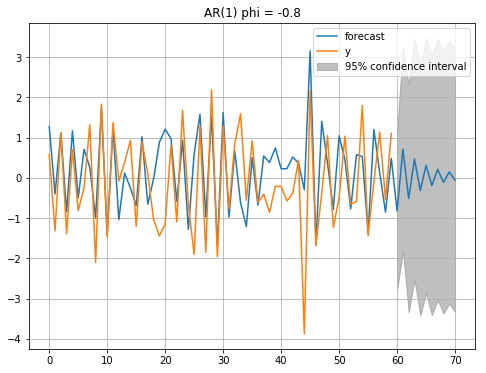

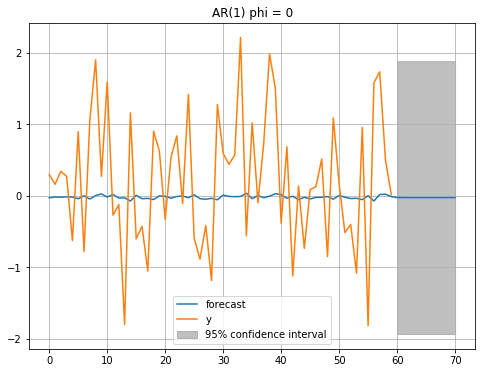

In [39]:
# See what happens when you scross through the data above for predict

plt.figure(1, figsize=(10,6))

mod = ARMA(data_ar1, order=(1,0))
res = mod.fit()
res.plot_predict(start=940, end=1010)
plt.title("AR(1) phi = 0.95")
plt.grid()
plt.show()

mod = ARMA(data_ar2, order=(1,0))
res = mod.fit()
res.plot_predict(start=940, end=1010)
plt.title("AR(1) phi = -0.8")
plt.grid()
plt.show()

mod = ARMA(data_ar3, order=(1,0))
res = mod.fit()
res.plot_predict(start=940, end=1010)
plt.title("AR(1) phi = 0")
plt.grid()
plt.show()


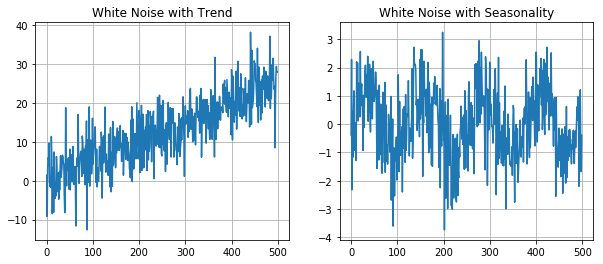

In [40]:
np.random.seed(17)
rv = stats.norm(0,5)

nx = 500
x = rv.rvs(nx)
y = np.zeros(nx)
z = np.zeros(nx)

for i in range(nx):
    y[i] = x[i]+i*0.05


rv = stats.norm(0,1)
x = rv.rvs(nx)
    
for i in range(nx):
    z[i] = np.sin(i*0.05)+x[i]

plt.figure(1, figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(y)
plt.grid()
plt.title("White Noise with Trend")
plt.subplot(1,2,2)
plt.plot(z)
plt.title("White Noise with Seasonality")
plt.grid()


#plt.savefig("Time Series with Trend")

In [41]:

def plot_diagnosticsTight3(data1,data2,data3):

    fig, axes = plt.subplots(1,3,figsize=(15,5))
    axes[0].set_ylabel('ACF', fontsize=10)
    axes[0].set_xlabel('Lag', fontsize=10)
    fig = plot_acf(data1,lags=40,zero=True, ax = axes[0], title= 'ACF phi =0.95', use_vlines = True)
    axes[1].set_ylabel('ACF', fontsize=10)
    axes[1].set_xlabel('Lag', fontsize=10)
    fig = plot_acf(data2,lags=40,zero=True, ax = axes[1], title= 'ACF phi = -0.8', use_vlines = True)
    axes[2].set_ylabel('ACF', fontsize=10)
    axes[2].set_xlabel('Lag', fontsize=10)
    fig = plot_acf(data3,lags=40,zero=True, ax = axes[2], title= 'ACF phi = 0', use_vlines = True) 
    plt.tight_layout()
#    plt.savefig("ACF2.png", dpi = 300)


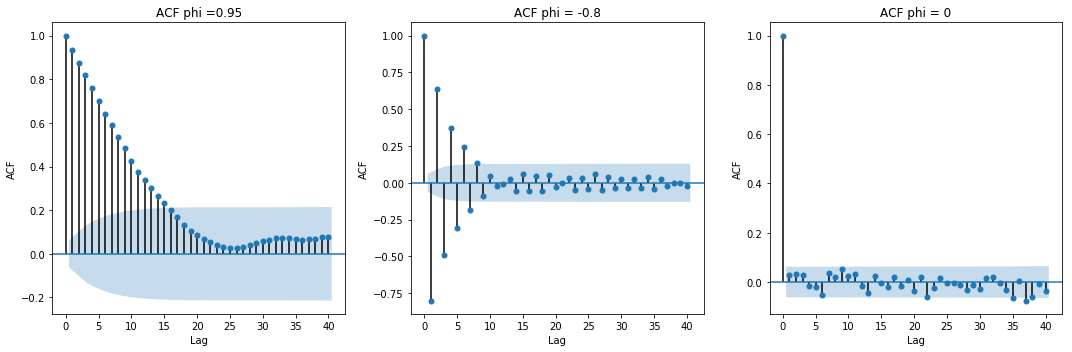

In [42]:
plot_diagnosticsTight3(data_ar1,data_ar2,data_ar3)

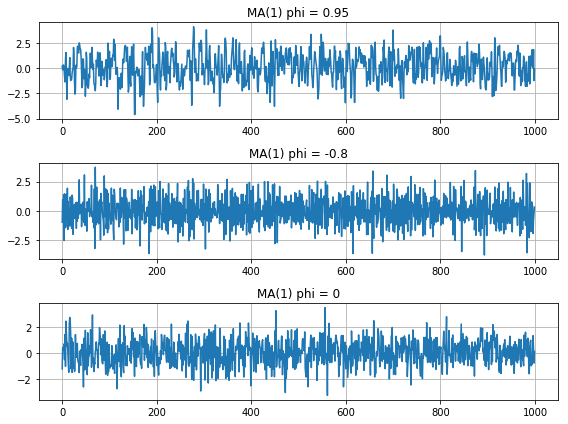

In [43]:
# AR for phi = 0.95
plt.subplot(3,1,1)
plt.title('MA(1) phi = 0.95')
phi = 0.95
phi1 = phi
ma1 = np.array([1, phi])#The input is inserted as negative in function
dummy = np.array([1])
result1 = ArmaProcess(dummy, ma1)#for the moment, no moving average, so this is just a dummy var
data_ma1 = result1.generate_sample(nsample=1000)
plt.plot(data_ma1)
plt.grid()

# AR for phi = -0.8
plt.subplot(3,1,2)
plt.title('MA(1) phi = -0.8')
phi = -0.8
phi2 = phi
ma1 = np.array([1, phi])#The input is inserted as negative in function
dummy = np.array([1])
result2 = ArmaProcess(dummy, ma1)#for the moment, no moving average, so this is just a dummy var
data_ma2 = result2.generate_sample(nsample=1000)
plt.plot(data_ma2)
plt.grid()


# AR for phi = 0
plt.subplot(3,1,3)
plt.title('MA(1) phi = 0')
phi = 0
phi3 = phi
ma1 = np.array([1, - phi])#The input is inserted as negative in function
dummy = np.array([1])
result3 = ArmaProcess(dummy, ma1)#for the moment, no moving average, so this is just a dummy var
data_ma3 = result3.generate_sample(nsample=1000)
plt.plot(data_ma3)
plt.grid()
plt.tight_layout()
#plt.savefig('ACF_MAExample')

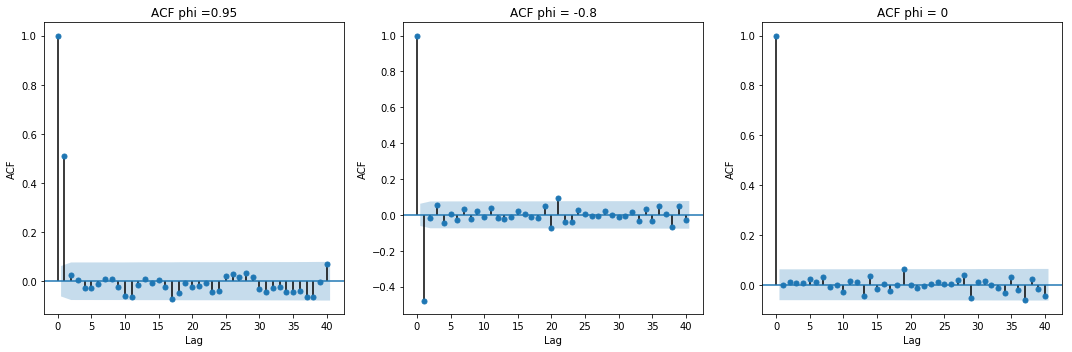

In [44]:
plot_diagnosticsTight3(data_ma1,data_ma2,data_ma3)